In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from models import residualAttention128, residualAttention56, residualAttention92, resnet101V2Model
import pandas as pd
from utils import plot_training_hist

In [5]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
x_train_10, x_vali_10, y_train_10, y_vali_10 = train_test_split(x_train_10, y_train_10, test_size=0.05, random_state=42)

## Residual Attention Network 56 (Attention-56)

In [2]:
model56 = residualAttention56()
model56.count_params()

21901002

In [8]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/attention56_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
model56.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = model56.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100)

Epoch 1/100
743/742 [==============================] - 154s 207ms/step - loss: 2.0620 - categorical_accuracy: 0.4188 - val_loss: 1.5473 - val_categorical_accuracy: 0.4868 - lr: 1.0000e-04
Epoch 2/100
743/742 [==============================] - 152s 204ms/step - loss: 1.4853 - categorical_accuracy: 0.4969 - val_loss: 1.3583 - val_categorical_accuracy: 0.5348 - lr: 1.0000e-04
Epoch 3/100
743/742 [==============================] - 148s 199ms/step - loss: 1.3792 - categorical_accuracy: 0.5306 - val_loss: 1.6553 - val_categorical_accuracy: 0.5008 - lr: 1.0000e-04
Epoch 4/100
743/742 [==============================] - 151s 204ms/step - loss: 1.3070 - categorical_accuracy: 0.5576 - val_loss: 1.1510 - val_categorical_accuracy: 0.6092 - lr: 1.0000e-04
Epoch 5/100
743/742 [==============================] - 148s 199ms/step - loss: 1.2316 - categorical_accuracy: 0.5858 - val_loss: 1.6101 - val_categorical_accuracy: 0.5284 - lr: 1.0000e-04
Epoch 6/100
743/742 [==============================] - 147s 

743/742 [==============================] - 151s 204ms/step - loss: 0.2591 - categorical_accuracy: 0.9105 - val_loss: 0.4162 - val_categorical_accuracy: 0.8696 - lr: 1.0000e-04
Epoch 45/100
743/742 [==============================] - 148s 199ms/step - loss: 0.2504 - categorical_accuracy: 0.9144 - val_loss: 0.4383 - val_categorical_accuracy: 0.8664 - lr: 1.0000e-04
Epoch 46/100
743/742 [==============================] - 148s 199ms/step - loss: 0.2429 - categorical_accuracy: 0.9169 - val_loss: 0.4344 - val_categorical_accuracy: 0.8764 - lr: 1.0000e-04
Epoch 47/100
743/742 [==============================] - 147s 198ms/step - loss: 0.2458 - categorical_accuracy: 0.9155 - val_loss: 0.4377 - val_categorical_accuracy: 0.8672 - lr: 1.0000e-04
Epoch 48/100
743/742 [==============================] - 148s 199ms/step - loss: 0.2321 - categorical_accuracy: 0.9208 - val_loss: 0.4610 - val_categorical_accuracy: 0.8628 - lr: 1.0000e-04
Epoch 49/100
743/742 [==============================] - 147s 199ms/s

743/742 [==============================] - 148s 199ms/step - loss: 0.0232 - categorical_accuracy: 0.9925 - val_loss: 0.3538 - val_categorical_accuracy: 0.9212 - lr: 4.0000e-06
Epoch 86/100
743/742 [==============================] - 148s 199ms/step - loss: 0.0236 - categorical_accuracy: 0.9920 - val_loss: 0.3625 - val_categorical_accuracy: 0.9180 - lr: 4.0000e-06
Epoch 87/100
743/742 [==============================] - 148s 199ms/step - loss: 0.0245 - categorical_accuracy: 0.9913 - val_loss: 0.3513 - val_categorical_accuracy: 0.9212 - lr: 4.0000e-06
Epoch 88/100
743/742 [==============================] - 147s 198ms/step - loss: 0.0236 - categorical_accuracy: 0.9922 - val_loss: 0.3625 - val_categorical_accuracy: 0.9208 - lr: 4.0000e-06
Epoch 89/100
743/742 [==============================] - 148s 199ms/step - loss: 0.0245 - categorical_accuracy: 0.9915 - val_loss: 0.3580 - val_categorical_accuracy: 0.9200 - lr: 4.0000e-06
Epoch 90/100
743/742 [==============================] - 148s 199ms/s

In [9]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/attention56-cifar10-hist.csv", index = False)

In [16]:
model56.load_weights("./saved_models/attention56_weights.hdf5")

In [11]:
model56.save("./saved_models/attention56")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: attention56/assets


In [19]:
model56.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 7s 699ms/step - loss: 0.4205 - categorical_accuracy: 0.8973


[0.42045748233795166, 0.8973000049591064]

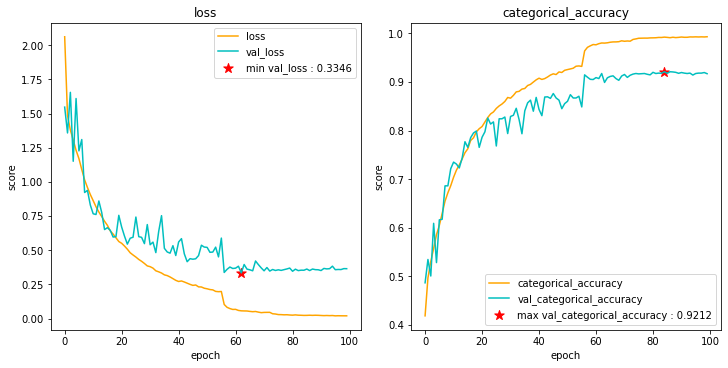

In [4]:
plot_training_hist(pd.read_csv("./saved_hists/attention56-cifar10-hist.csv"))

## Residual Attention Network 92 (Attention-92)

In [2]:
model92 = residualAttention92()
model92.count_params()

37515210

In [9]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/attention92_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
model92.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = model92.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100)

Epoch 1/100
743/742 [==============================] - 261s 352ms/step - loss: 3.3406 - categorical_accuracy: 0.3808 - val_loss: 1.9289 - val_categorical_accuracy: 0.4300 - lr: 1.0000e-04
Epoch 2/100
743/742 [==============================] - 258s 348ms/step - loss: 1.6577 - categorical_accuracy: 0.4567 - val_loss: 1.5007 - val_categorical_accuracy: 0.4960 - lr: 1.0000e-04
Epoch 3/100
743/742 [==============================] - 259s 348ms/step - loss: 1.5504 - categorical_accuracy: 0.4855 - val_loss: 1.4661 - val_categorical_accuracy: 0.5056 - lr: 1.0000e-04
Epoch 4/100
743/742 [==============================] - 252s 340ms/step - loss: 1.4901 - categorical_accuracy: 0.5071 - val_loss: 1.5144 - val_categorical_accuracy: 0.5416 - lr: 1.0000e-04
Epoch 5/100
743/742 [==============================] - 253s 340ms/step - loss: 1.4378 - categorical_accuracy: 0.5274 - val_loss: 1.5460 - val_categorical_accuracy: 0.5208 - lr: 1.0000e-04
Epoch 6/100
743/742 [==============================] - 259s 

743/742 [==============================] - 253s 340ms/step - loss: 0.2580 - categorical_accuracy: 0.9124 - val_loss: 0.6121 - val_categorical_accuracy: 0.8400 - lr: 1.0000e-04
Epoch 45/100
743/742 [==============================] - 259s 348ms/step - loss: 0.2493 - categorical_accuracy: 0.9151 - val_loss: 0.4051 - val_categorical_accuracy: 0.8776 - lr: 1.0000e-04
Epoch 46/100
743/742 [==============================] - 253s 340ms/step - loss: 0.2371 - categorical_accuracy: 0.9177 - val_loss: 0.4652 - val_categorical_accuracy: 0.8656 - lr: 1.0000e-04
Epoch 47/100
743/742 [==============================] - 252s 340ms/step - loss: 0.2385 - categorical_accuracy: 0.9179 - val_loss: 0.4730 - val_categorical_accuracy: 0.8676 - lr: 1.0000e-04
Epoch 48/100
743/742 [==============================] - 253s 340ms/step - loss: 0.2312 - categorical_accuracy: 0.9207 - val_loss: 0.6563 - val_categorical_accuracy: 0.8288 - lr: 1.0000e-04
Epoch 49/100
743/742 [==============================] - 252s 340ms/s

743/742 [==============================] - 252s 339ms/step - loss: 0.0304 - categorical_accuracy: 0.9901 - val_loss: 0.3865 - val_categorical_accuracy: 0.9176 - lr: 2.0000e-05
Epoch 87/100
743/742 [==============================] - 252s 339ms/step - loss: 0.0300 - categorical_accuracy: 0.9896 - val_loss: 0.4720 - val_categorical_accuracy: 0.8988 - lr: 2.0000e-05
Epoch 88/100
743/742 [==============================] - 258s 348ms/step - loss: 0.0294 - categorical_accuracy: 0.9902 - val_loss: 0.3691 - val_categorical_accuracy: 0.9236 - lr: 2.0000e-05
Epoch 89/100
743/742 [==============================] - 252s 339ms/step - loss: 0.0276 - categorical_accuracy: 0.9903 - val_loss: 0.3855 - val_categorical_accuracy: 0.9128 - lr: 2.0000e-05
Epoch 90/100
743/742 [==============================] - 252s 339ms/step - loss: 0.0266 - categorical_accuracy: 0.9900 - val_loss: 0.3940 - val_categorical_accuracy: 0.9108 - lr: 2.0000e-05
Epoch 91/100
743/742 [==============================] - 252s 339ms/s

In [10]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/attention92-cifar10-hist.csv", index = False)
model92.load_weights("./saved_weights/attention92_weights.hdf5")
model92.save("./saved_models/attention92")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: attention92/assets


In [13]:
model92.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 12s 1s/step - loss: 0.4857 - categorical_accuracy: 0.8995


[0.48574209213256836, 0.8995000123977661]

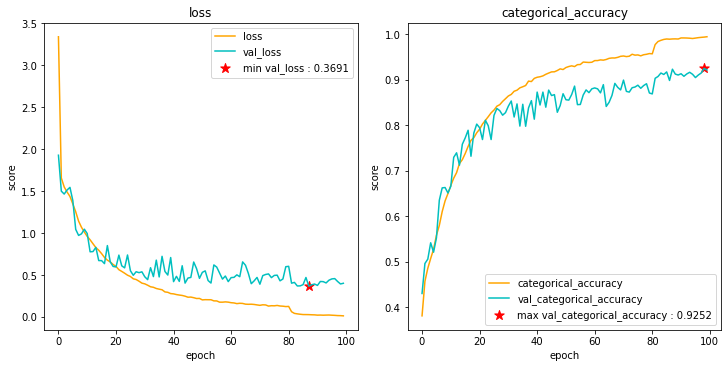

In [5]:
plot_training_hist(pd.read_csv("./saved_hists/attention92-cifar10-hist.csv"))

## Residual Network 101 (ResNet101V2)

In [4]:
modelresnet101 = resnet101V2Model()
modelresnet101.count_params()

42647050

In [22]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/resnet101_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
modelresnet101.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = modelresnet101.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100,
    verbose=1)

Epoch 1/100
743/742 [==============================] - 72s 97ms/step - loss: 2.0592 - categorical_accuracy: 0.2544 - val_loss: 1.8470 - val_categorical_accuracy: 0.3404 - lr: 1.0000e-04
Epoch 2/100
743/742 [==============================] - 71s 95ms/step - loss: 1.7624 - categorical_accuracy: 0.3557 - val_loss: 1.6775 - val_categorical_accuracy: 0.3896 - lr: 1.0000e-04
Epoch 3/100
743/742 [==============================] - 70s 94ms/step - loss: 1.6495 - categorical_accuracy: 0.3987 - val_loss: 1.5246 - val_categorical_accuracy: 0.4316 - lr: 1.0000e-04
Epoch 4/100
743/742 [==============================] - 70s 94ms/step - loss: 1.5692 - categorical_accuracy: 0.4315 - val_loss: 1.4703 - val_categorical_accuracy: 0.4692 - lr: 1.0000e-04
Epoch 5/100
743/742 [==============================] - 70s 95ms/step - loss: 1.4870 - categorical_accuracy: 0.4616 - val_loss: 1.4109 - val_categorical_accuracy: 0.4916 - lr: 1.0000e-04
Epoch 6/100
743/742 [==============================] - 70s 95ms/step -

Epoch 45/100
743/742 [==============================] - 66s 88ms/step - loss: 0.4916 - categorical_accuracy: 0.8261 - val_loss: 0.6448 - val_categorical_accuracy: 0.7752 - lr: 1.0000e-04
Epoch 46/100
743/742 [==============================] - 66s 89ms/step - loss: 0.4650 - categorical_accuracy: 0.8351 - val_loss: 0.7373 - val_categorical_accuracy: 0.7568 - lr: 1.0000e-04
Epoch 47/100
743/742 [==============================] - 66s 89ms/step - loss: 0.4756 - categorical_accuracy: 0.8299 - val_loss: 0.7119 - val_categorical_accuracy: 0.7692 - lr: 1.0000e-04
Epoch 48/100
743/742 [==============================] - 66s 88ms/step - loss: 0.4516 - categorical_accuracy: 0.8388 - val_loss: 0.8101 - val_categorical_accuracy: 0.7416 - lr: 1.0000e-04
Epoch 49/100
743/742 [==============================] - 66s 88ms/step - loss: 0.4598 - categorical_accuracy: 0.8377 - val_loss: 0.7578 - val_categorical_accuracy: 0.7664 - lr: 1.0000e-04
Epoch 50/100
743/742 [==============================] - 66s 88ms/

Epoch 87/100
743/742 [==============================] - ETA: 0s - loss: 0.1802 - categorical_accuracy: 0.9357
Epoch 00087: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
743/742 [==============================] - 66s 89ms/step - loss: 0.1802 - categorical_accuracy: 0.9357 - val_loss: 0.7049 - val_categorical_accuracy: 0.8060 - lr: 4.0000e-06
Epoch 88/100
743/742 [==============================] - 66s 89ms/step - loss: 0.1810 - categorical_accuracy: 0.9356 - val_loss: 0.6854 - val_categorical_accuracy: 0.8100 - lr: 8.0000e-07
Epoch 89/100
743/742 [==============================] - 66s 89ms/step - loss: 0.1777 - categorical_accuracy: 0.9363 - val_loss: 0.6852 - val_categorical_accuracy: 0.8136 - lr: 8.0000e-07
Epoch 90/100
743/742 [==============================] - 66s 89ms/step - loss: 0.1737 - categorical_accuracy: 0.9384 - val_loss: 0.6834 - val_categorical_accuracy: 0.8112 - lr: 8.0000e-07
Epoch 91/100
743/742 [==============================] - 66s 88ms/step - los

In [23]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/resnet101-cifar10-hist.csv", index = False)
modelresnet101.load_weights("./saved_weights/resnet101_weights.hdf5")
modelresnet101.save("./saved_models/resnet101")

INFO:tensorflow:Assets written to: resnet101/assets


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
modelresnet101.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 1s 85ms/step - loss: 0.6482 - categorical_accuracy: 0.7936


[0.6481916308403015, 0.7936000227928162]

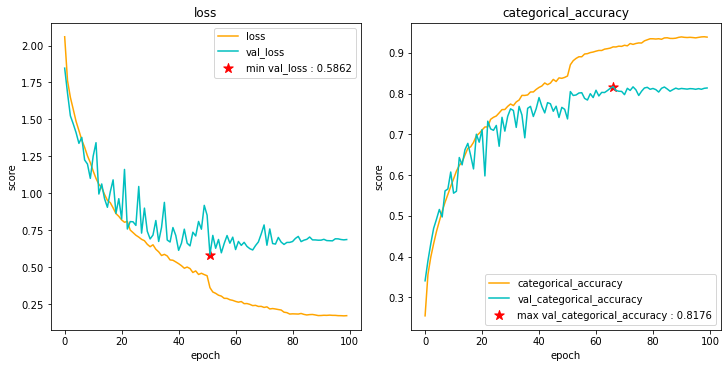

In [6]:
plot_training_hist(pd.read_csv("./saved_hists/resnet101-cifar10-hist.csv"))